In [1]:
%matplotlib inline

In [2]:
from IPython.display import Image
import pandas as pd
import numpy as np

# Intro to Pandas

`pandas` is in **no small part** the reason I started using `python`

It makes working with data `agile` and `flexible`

## Series and DataFrame Objects

Many examples are taken from: http://pandas.pydata.org/pandas-docs/stable/dsintro.html

The two **primary** data objects in Pandas are:

1. Series
2. DataFrames

DataFrames can be thought of as a collection of Series. 

Selecting a column in a DataFrame will return a Series Object.

The `columns` and `rows` are accessible using `labels` and provides the core infrastructure for `labelled arrays`

A **key** to `pandas`:

> Data Alignment is intrinsic, so the link between labels and data will not be broken unless done so explicitly by you.

### Series

**Series** is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index which can include Index or MultiIndex objects

```
s = pd.Series(data, index=index)
```

data can take many different forms (i.e. dict, ndarray, lists, scalar etc)

#### From Numpy Arrays

In [3]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [4]:
type(s)

pandas.core.series.Series

In [5]:
s

a    0.017902
b    1.382879
c    0.704255
d   -0.117395
e    0.001272
dtype: float64

In [6]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [7]:
#-No Index Specified then will default to a numeric index-#
s = pd.Series(np.random.randn(5))

In [8]:
s

0   -0.187907
1   -0.788736
2    2.131106
3   -2.448450
4   -0.565207
dtype: float64

#### Series Objects are Similar to Array Behaviour

In [9]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [10]:
s

a   -0.827185
b   -0.620506
c    0.195761
d    1.454760
e    1.676917
dtype: float64

In [11]:
s[0]

-0.8271853893793598

In [12]:
s[1:3]

b   -0.620506
c    0.195761
dtype: float64

In [13]:
s.median()

0.19576053821139447

In [14]:
s[s > s.median()]

d    1.454760
e    1.676917
dtype: float64

In [15]:
s[[3,2,1]]

d    1.454760
c    0.195761
b   -0.620506
dtype: float64

#### Indexing via labels can be done through the `loc` operator (more important for DataFrames)

In [16]:
s.loc[['d','e']]

d    1.454760
e    1.676917
dtype: float64

**but** you can also use masks for pd.Series

In [17]:
s[['d','e']]

d    1.454760
e    1.676917
dtype: float64

#### Operations on Series Objects (Context Driven)

In [18]:
s

a   -0.827185
b   -0.620506
c    0.195761
d    1.454760
e    1.676917
dtype: float64

In [19]:
s + s

a   -1.654371
b   -1.241012
c    0.391521
d    2.909521
e    3.353835
dtype: float64

In [20]:
s * 2   # the value 2 is broadcast across s

a   -1.654371
b   -1.241012
c    0.391521
d    2.909521
e    3.353835
dtype: float64

In [21]:
np.sqrt(s)

/Users/matthewmckay/anaconda3/envs/lecture-python/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


a         NaN
b         NaN
c    0.442448
d    1.206134
e    1.294958
dtype: float64

A **key** difference between Series and ndarray is that operations between Series automatically align the data based on **labels**. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [22]:
s[2:]                  #No A,B

c    0.195761
d    1.454760
e    1.676917
dtype: float64

In [23]:
s[:-2]                  #No D,E

a   -0.827185
b   -0.620506
c    0.195761
dtype: float64

In [24]:
s[2:] + s[:-2]         #Only C, Alignment is automatic, Union of Index Values

a         NaN
b         NaN
c    0.391521
d         NaN
e         NaN
dtype: float64

#### Useful Built In Methods

In [25]:
s.describe()

count    5.000000
mean     0.375949
std      1.154261
min     -0.827185
25%     -0.620506
50%      0.195761
75%      1.454760
max      1.676917
dtype: float64

-----------------------------------------------------------------------

### DataFrame

Reference: https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html

**DataFrame** is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. **It is generally the most commonly used pandas object**. Like Series, DataFrame accepts many different kinds of input:

1. Dictionary of 1D ndarrays, lists, dicts, or Series
1. 2-D numpy.ndarray
1. A Series
1. Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments.

**Note:** DataFrames have become a standard in the Python ecosystem and can be used with a lot of packages such as **statsmodels**, **scikit-learn** ...

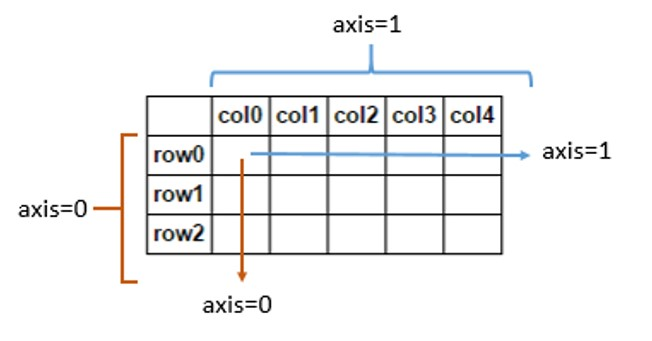

In [26]:
Image(filename='dataframe.jpg')

In [27]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)

In [28]:
df          #-Automatic Alignment of Series based on Index-#

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [29]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [30]:
df.columns

Index(['one', 'two'], dtype='object')

#### Accessing Columns

In [31]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [32]:
type(df['one'])

pandas.core.series.Series

#### Accessing Rows

In [33]:
df.loc['b']

one    2.0
two    2.0
Name: b, dtype: float64

In [34]:
type(df.loc['b'])

pandas.core.series.Series

#### Adding Rows

In [35]:
df['three'] = df['one'] + df['two']

In [36]:
df

,one,two,three
a,1.0,1.0,2.0
b,2.0,2.0,4.0
c,3.0,3.0,6.0
d,NaN,4.0,NaN


#### Selecting Multiple Columns

In [37]:
df[['one','three']]

,one,three
a,1.0,2.0
b,2.0,4.0
c,3.0,6.0
d,NaN,NaN


#### Selecting Multiple Rows

In [38]:
df.loc[['b','c']]

,one,two,three
b,2.0,2.0,4.0
c,3.0,3.0,6.0


#### Inserting Scalars

In [39]:
df['four'] = "What"   #Fill the Column

In [40]:
df

,one,two,three,four
a,1.0,1.0,2.0,What
b,2.0,2.0,4.0,What
c,3.0,3.0,6.0,What
d,NaN,4.0,NaN,What


#### Deleting a Column

In [41]:
del df['four']

In [42]:
df

,one,two,three
a,1.0,1.0,2.0
b,2.0,2.0,4.0
c,3.0,3.0,6.0
d,NaN,4.0,NaN


## Index Objects and Reshaping

In [43]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                    'B' : ['A', 'B', 'C'] * 4,
                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})

In [44]:
df

,A,B,C,D,E
0,one,A,foo,-1.049487,1.298387
1,one,B,foo,-2.298262,2.591540
2,two,C,foo,0.180867,0.644128
3,three,A,bar,-0.422638,0.888400
4,one,B,bar,0.670625,0.949071
5,one,C,bar,-0.362793,-0.066569
6,two,A,foo,-0.594108,-1.768471
7,three,B,foo,-1.173408,-0.234722
8,one,C,foo,3.049267,1.562311
9,one,A,bar,-0.972253,-0.012570


In [45]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.972253 -1.049487
      B  0.670625 -2.298262
      C -0.362793  3.049267
three A -0.422638       NaN
      B       NaN -1.173408
      C -0.623433       NaN
two   A       NaN -0.594108
      B  1.159982       NaN
      C       NaN  0.180867

**Using MultiIndex** to reorganize the information in a DataFrame

In [46]:
dfi = df.set_index(['A','B','C'])

In [47]:
dfi

D         E
A     B C                      
one   A foo -1.049487  1.298387
      B foo -2.298262  2.591540
two   C foo  0.180867  0.644128
three A bar -0.422638  0.888400
one   B bar  0.670625  0.949071
      C bar -0.362793 -0.066569
two   A foo -0.594108 -1.768471
three B foo -1.173408 -0.234722
one   C foo  3.049267  1.562311
      A bar -0.972253 -0.012570
two   B bar  1.159982  0.125944
three C bar -0.623433  1.064005

In [48]:
dfi.unstack(level='C')

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A -0.972253 -1.049487 -0.012570  1.298387
      B  0.670625 -2.298262  0.949071  2.591540
      C -0.362793  3.049267 -0.066569  1.562311
three A -0.422638       NaN  0.888400       NaN
      B       NaN -1.173408       NaN -0.234722
      C -0.623433       NaN  1.064005       NaN
two   A       NaN -0.594108       NaN -1.768471
      B  1.159982       NaN  0.125944       NaN
      C       NaN  0.180867       NaN  0.644128

In [49]:
dfi['D'].unstack(level='C')

C             bar       foo
A     B                    
one   A -0.972253 -1.049487
      B  0.670625 -2.298262
      C -0.362793  3.049267
three A -0.422638       NaN
      B       NaN -1.173408
      C -0.623433       NaN
two   A       NaN -0.594108
      B  1.159982       NaN
      C       NaN  0.180867

-----------------------------------------------------------------------

## Split-Apply-Combine

DataFrames also support more advanced operations such as **groupby**  which can be very powerful when aggregating data based on groups and performing some operations over them

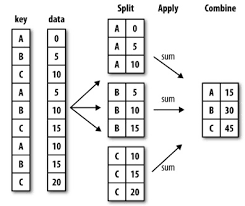

In [50]:
Image(filename='split-apply-combine.png')

In [51]:
key = ['A','B','C','A','B','C','A','B','C']
data = [0,5,10,5,10,15,10,15,20]
df = pd.DataFrame(data, index=key, columns=['data'])

In [52]:
df

,data
A,0
B,5
C,10
A,5
B,10
C,15
A,10
B,15
C,20


In [53]:
#-Groupby Index Level-#
df.groupby(level=0).sum()

,data
A,15
B,30
C,45


In [54]:
#Groupby values in a column-#
df = df.reset_index()
df.columns=["key","data"]

In [55]:
df.groupby(by=["key"]).sum()

,data
key,
A,15
B,30
C,45


## Working with Special Types of Data (TimeSeries)

**Pandas** has a support for different types of data such as:

Reference: http://pandas.pydata.org/pandas-docs/stable/10min.html

In [56]:
rng = pd.date_range('1/1/2012', periods=200, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [57]:
ts.head()

2012-01-01 00:00:00    238
2012-01-01 00:00:01    314
2012-01-01 00:00:02     99
2012-01-01 00:00:03    470
2012-01-01 00:00:04    473
Freq: S, dtype: int64

In [58]:
ts.tail()

2012-01-01 00:03:15    411
2012-01-01 00:03:16    227
2012-01-01 00:03:17     38
2012-01-01 00:03:18     18
2012-01-01 00:03:19     86
Freq: S, dtype: int64

#### Resampling the Time Series

In [59]:
ts.resample('1Min')

In [60]:
ts.resample('1Min').mean()

2012-01-01 00:00:00    246.816667
2012-01-01 00:01:00    259.050000
2012-01-01 00:02:00    245.233333
2012-01-01 00:03:00    179.600000
Freq: T, dtype: float64

In [61]:
ts.resample('1Min').sum()

2012-01-01 00:00:00    14809
2012-01-01 00:01:00    15543
2012-01-01 00:02:00    14714
2012-01-01 00:03:00     3592
Freq: T, dtype: int64

#### Working with Time Series Data

Let's work with some random generated data)

In [62]:
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/1990', periods=1000))

In [63]:
s.head()

1990-01-01    0.017029
1990-01-02   -0.815193
1990-01-03   -1.716036
1990-01-04    0.329750
1990-01-05   -1.479726
Freq: D, dtype: float64

In [64]:
s.tail()

1992-09-22   -1.337106
1992-09-23    1.113283
1992-09-24    1.170397
1992-09-25    0.325175
1992-09-26    0.559233
Freq: D, dtype: float64

In [65]:
len(s)

1000

In [66]:
s = s.cumsum()      #Generate a cumulative sum

In [67]:
r = s.rolling(window=60).mean()

In [68]:
data = pd.DataFrame({'s' : s, 'r' : r})

<AxesSubplot:>

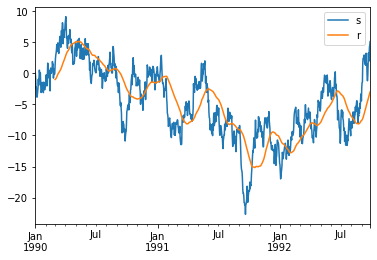

In [69]:
data.plot()